In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing data from csv , while changing d-type for column 'Initial release date' (object) into datetime format

In [2]:
vg_df = pd.read_csv(r"C:\Users\hp\Downloads\dataminer (1).csv", parse_dates=['Initial  release date'])

In [3]:
vg_df

,Unnamed: 0,Title,Sales,Platform(s),Initial release date,Developer(s),Publisher(s)
0,0,Minecraft,"20,00,00,000",Multi-platform,2011-11-18,Mojang Studios,Mojang Studios
1,1,Grand Theft Auto V,"13,00,00,000",Multi-platform,2013-09-17,Rockstar North,Rockstar Games
2,2,Tetris (EA),"10,00,00,000",Mobile,2006-09-12,EA Mobile,Electronic Arts
3,3,Wii Sports,"8,29,00,000",Wii,2006-11-19,Nintendo EAD,Nintendo
4,4,PlayerUnknown's Battlegrounds,"6,00,00,000",Multi-platform,2017-12-20,PUBG Corporation,PUBG Corporation
5,5,Super Mario Bros.,"4,82,40,000",Multi-platform,1985-09-13,Nintendo,Nintendo
6,6,Pokémon Red / Green / Blue / Yellow,"4,75,20,000",Multi-platform,1996-02-27,Game Freak,Nintendo
7,7,Wii Fit and Wii Fit Plus,"4,38,00,000",Wii,2007-12-01,Nintendo EAD,Nintendo
8,8,Tetris (Nintendo),"4,30,00,000",Game Boy / NES,1989-06-14,Nintendo R&D1,Nintendo
9,9,Pac-Man,"3,90,98,000",Multi-platform,1980-07-01,Namco,Namco


In [4]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             51 non-null     int64         
 1   Title                  51 non-null     object        
 2   Sales                  51 non-null     object        
 3   Platform(s)            51 non-null     object        
 4   Initial  release date  51 non-null     datetime64[ns]
 5   Developer(s)           51 non-null     object        
 6   Publisher(s)           51 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.9+ KB


### changing datatype of "sales" column from object to integer and also removing commas in values

In [8]:
vg_df['Sales'] =vg_df['Sales'].str.replace(',', '').astype(int)

In [10]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             51 non-null     int64         
 1   Title                  51 non-null     object        
 2   Sales                  51 non-null     int32         
 3   Platform(s)            51 non-null     object        
 4   Initial  release date  51 non-null     datetime64[ns]
 5   Developer(s)           51 non-null     object        
 6   Publisher(s)           51 non-null     object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 2.7+ KB


### (1) top sales video game

In [19]:
top_5_sales= vg_df.sort_values(['Sales'], ascending=False).head(5)
top_5_sales

,Unnamed: 0,Title,Sales,Platform(s),Initial release date,Developer(s),Publisher(s)
0,0,Minecraft,200000000,Multi-platform,2011-11-18,Mojang Studios,Mojang Studios
1,1,Grand Theft Auto V,130000000,Multi-platform,2013-09-17,Rockstar North,Rockstar Games
2,2,Tetris (EA),100000000,Mobile,2006-09-12,EA Mobile,Electronic Arts
3,3,Wii Sports,82900000,Wii,2006-11-19,Nintendo EAD,Nintendo
4,4,PlayerUnknown's Battlegrounds,60000000,Multi-platform,2017-12-20,PUBG Corporation,PUBG Corporation


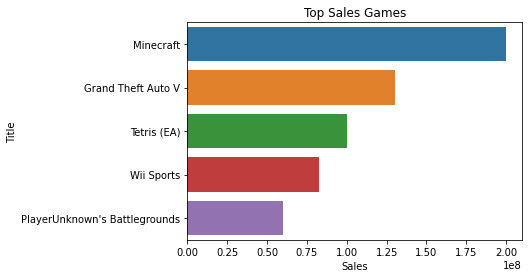

In [73]:
sns.barplot(x="Sales", y="Title", data=top_5_sales)
plt.title('Top Sales Games')
plt.show()

### (2) which platform has highest game

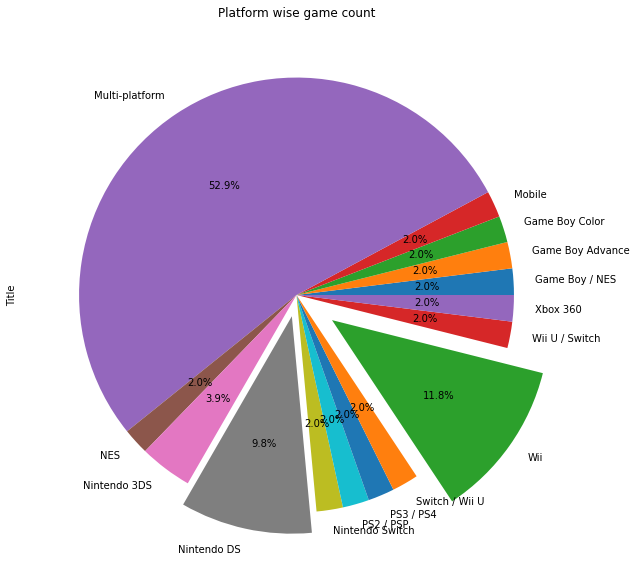

In [86]:
plt.figure(figsize = (20,10))
vg_df.groupby('Platform(s)')['Title'].count().plot(kind='pie', explode=(0,0,0,0,0,0,0,0.1,0,0,0,0,0.2,0,0), autopct='%0.1f%%', title='Platform wise game count')
plt.show()

### (3) platform wise highest sales 

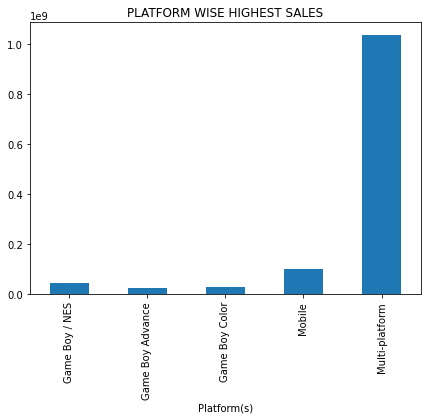

In [41]:
plt.figure(figsize=(7,5))
vg_df.groupby('Platform(s)')['Sales'].sum().head(5).plot(kind='bar', title='PLATFORM WISE HIGHEST SALES')
plt.show()

### (4) which year has highest game release
_here we have to extract year from datetime format column 'Initial Release Date' And then we can plot it_

In [44]:
vg_df['Year'] = vg_df['Initial  release date'].dt.year

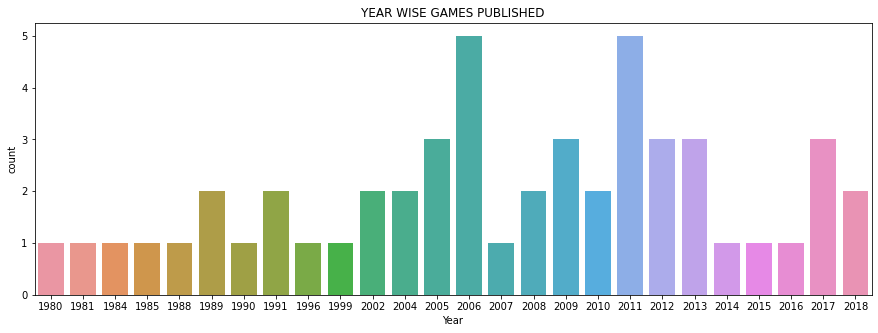

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x='Year', data=vg_df)
plt.title('YEAR WISE GAMES PUBLISHED')
plt.show()

### (5) which publisher has publish highest game and their total sales

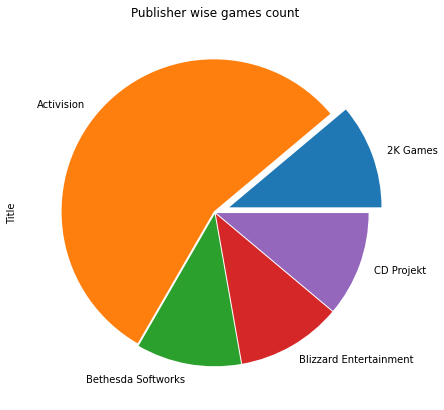

In [78]:
plt.figure(figsize=(7,7))
vg_df.groupby('Publisher(s)')['Title'].count().head().plot(kind='pie', explode=(0.1,0.01,0.01,0.01,0.01), title='Publisher wise games count')
plt.show()

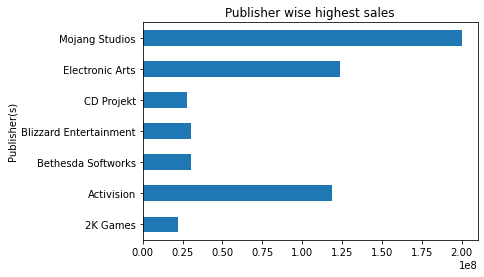

In [77]:
vg_df.groupby('Publisher(s)')['Sales'].sum().head(7).plot(kind='barh')
plt.title('Publisher wise highest sales')
plt.show()